In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [20]:
df=pd.read_csv('covid-19(India).csv')
#df['Date']=pd.to_datetime(df.Date)
#df.sort_values(by='Date')
dt=df.groupby(['Date'], sort=False)['Infected'].agg(np.sum).reset_index()
dt['confirmed']=dt['Infected'].cumsum()
dt

,Date,Infected,confirmed
0,03-02-2020,3,3
1,02-03-2020,2,5
2,03-03-2020,2,7
3,04-03-2020,20,27
4,05-03-2020,1,28
...,...,...,...
87,30-05-2020,8945,182414
88,31-05-2020,7985,190399
89,01-06-2020,8773,199172
90,02-06-2020,9300,208472


In [21]:
dt['days']=np.arange(0, len(dt), 1)
data=dt[['days', 'confirmed']]
data

,days,confirmed
0,0,3
1,1,5
2,2,7
3,3,27
4,4,28
...,...,...
87,87,182414
88,88,190399
89,89,199172
90,90,208472


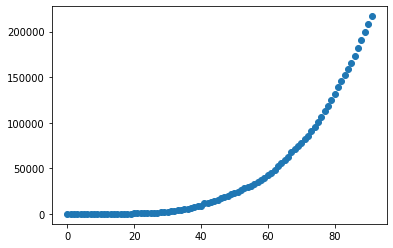

In [22]:
plt.scatter(data['days'], data['confirmed'])

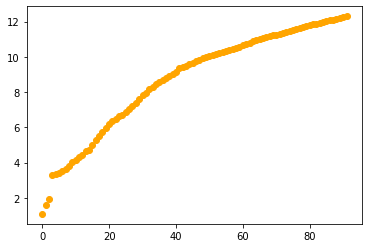

In [23]:
plt.scatter(data['days'], np.log(data['confirmed']), color='orange')

In [24]:
X, Y=np.array(data['days']).reshape(-1, 1), np.array(np.log(data['confirmed'])).reshape(-1, 1)
reg=LinearRegression()
reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

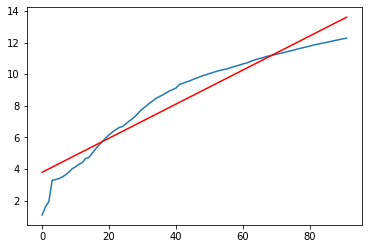

In [25]:
plt.plot(X, Y)
Y_pred=reg.predict(X)
prediction_space= ([min(X), max(X)])
plt.plot(prediction_space, [min(Y_pred), max(Y_pred)], color='red')

m=(max(Y_pred)-min(Y_pred))/(max(X)-min(X))

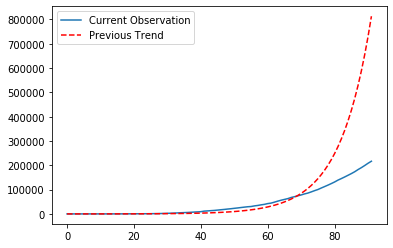

In [26]:
plt.plot(data['days'], data['confirmed'], label='Current Observation')
Y_pred=np.exp(reg.predict(X))
plt.plot(X, Y_pred, color='red', linestyle='dashed', label='Previous Trend')
plt.legend()

In [27]:
test=np.arange(len(data), len(data)+21, 1)
reg.score(X, Y)

0.9217003209794383

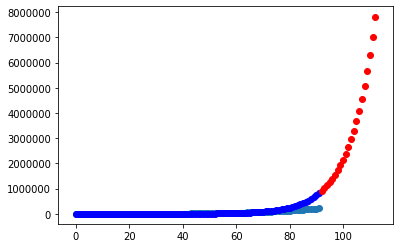

In [28]:
plt.scatter(data['days'], data['confirmed'])
Y_pred=np.exp(reg.predict(X))
plt.scatter(X, Y_pred, color='blue')
plt.scatter(test, np.exp(reg.predict(test.reshape(-1, 1))), color='red')

In [29]:
future=np.arange(len(data), len(data)+21, 1)
predictions=np.exp(reg.predict(future.reshape(-1, 1)))
future, predictions

(array([ 92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112]),
 array([[ 905913.65547047],
        [1009017.94797643],
        [1123856.7971578 ],
        [1251765.74217617],
        [1394232.32323597],
        [1552913.38120228],
        [1729654.32613124],
        [1926510.59879997],
        [2145771.57482681],
        [2389987.18937896],
        [2661997.59210464],
        [2964966.17716694],
        [3302416.37250827],
        [3678272.61619269],
        [4096905.996368  ],
        [4563185.08562574],
        [5082532.56094649],
        [5660988.26770225],
        [6305279.46113043],
        [7022899.04216497],
        [7822192.69748263]]))

In [30]:
dt=df.groupby(['Date'], sort=False)['Infected'].agg(np.sum).reset_index()
dt['confirmed']=dt['Infected'].cumsum()
#dt=dt.iloc[4:]
dt 

,Date,Infected,confirmed
0,03-02-2020,3,3
1,02-03-2020,2,5
2,03-03-2020,2,7
3,04-03-2020,20,27
4,05-03-2020,1,28
...,...,...,...
87,30-05-2020,8945,182414
88,31-05-2020,7985,190399
89,01-06-2020,8773,199172
90,02-06-2020,9300,208472


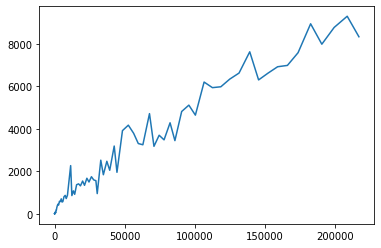

In [31]:
plt.plot(dt['confirmed'],dt['Infected'])

In [32]:
m

array([0.10778881])

In [33]:
1.0+m*14+m**2*24

array([2.78788559])

# State-Wise

In [34]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1835 entries, 0 to 1834
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State           1835 non-null   object
 1   Place           1766 non-null   object
 2   Date            1835 non-null   object
 3   Time            1835 non-null   object
 4   Infected        1835 non-null   int64 
 5   Total_Infected  1835 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 86.1+ KB


In [35]:
df['State'].unique()

array(['Kerela', 'Delhi', 'Telangana', 'Rajasthan', 'Haryana',
       'Uttar Pradesh', 'Ladakh', 'Tamil Nadu', 'Jammu And Kashmir',
       'Punjab', 'Karnataka', 'Maharashtra', 'Andhra Pradesh', 'Odisha',
       'Uttarakhand', 'West Bengal', 'Pondicherry', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman And Nicobar', 'Goa',
       'Assam', 'Jharkhand', 'Arunachal Pradesh', 'Tripura',
       'Dadra And Nagar Haveli', 'Meghalaya', 'Nagaland', 'Unassigned',
       'Sikkim'], dtype=object)

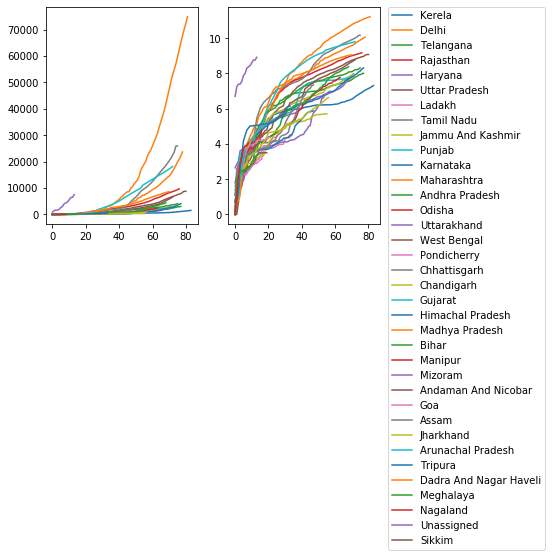

In [36]:
fig, ((ax1), (ax2))=plt.subplots(1,2)

def state(statename):
    statedata=df.loc[df['State']==statename]
    grouped=statedata.groupby(['Date'], sort=False)['Infected'].agg(np.sum).reset_index()
    grouped['confirmed']=grouped['Infected'].cumsum()
    ax1.plot(grouped.index, grouped['confirmed'], label=statename)
    #ax1.legend()
    ax2.plot(grouped.index, np.log(grouped['confirmed']), label=statename)
    #ax2.legend()

    return

for states in df['State'].unique():
    state(states)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.tight_layout(pad=10.0)    
plt.show()